In [1]:
from main import main

main()

TP 3: PERCEPTRON SIMPLE
EJERCIO 1
Función lógica AND
Entrenando con Perceptron Simple Escalon
Pesos finales: [-0.04201514  0.3055802   0.28522244], error: 0.0
Generalizando con Perceptron Simple Escalon
Entrada: 
[[-1  1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]]
Resultado: [-1 -1 -1  1]

Función lógica XOR
Entrenando con Perceptron Simple Escalon
Pesos finales: [0.60984822 0.02628291 0.58533824], error: 1.0
Generalizando con Perceptron Simple Escalon
Entrada: 
[[-1  1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]]
Resultado: [ 1  1 -1  1]

EJERCIO 2
Entrenando con Perceptron Simple Lineal
Error: 1301.3984956010925 en la fila 0 de la corrida 0
Error: 1307.0593340777548 en la fila 1 de la corrida 1
Error: 959.4350533009199 en la fila 2 de la corrida 2
Error: 970.9250731189123 en la fila 3 de la corrida 3
Error: 5774.420967719742 en la fila 4 de la corrida 4
Error: 4009.654160847342 en la fila 5 de la corrida 5
Error: 4003.7898088620036 en la fila 6 de la corrida 6
Error: 4620.0652860776045 en la fila 7 de la corrida 7

In [4]:
from main3a import main3a
main3a()

EJERCICIO 3 A
Función lógica XOR
[[-1  1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]]
[ 1  1 -1 -1]
Actual epoch: 0
Actual epoch: 100
Actual epoch: 200
Actual epoch: 300
Actual epoch: 400
Actual epoch: 500
Actual epoch: 600
Actual epoch: 700
Actual epoch: 800
Actual epoch: 900
Actual epoch: 1000
Actual epoch: 1100
Actual epoch: 1200
Actual epoch: 1300
Actual epoch: 1400
Actual epoch: 1500
Actual epoch: 1600
Actual epoch: 1700
Actual epoch: 1800
Actual epoch: 1900
Actual epoch: 2000
Actual epoch: 2100
Actual epoch: 2200
Actual epoch: 2300
Actual epoch: 2400
Actual epoch: 2500
Actual epoch: 2600
Actual epoch: 2700
Actual epoch: 2800
Actual epoch: 2900
Actual epoch: 3000
Actual epoch: 3100
Actual epoch: 3200
Actual epoch: 3300
Actual epoch: 3400
Actual epoch: 3500
Actual epoch: 3600
Actual epoch: 3700
Actual epoch: 3800
Actual epoch: 3900
Actual epoch: 4000
Actual epoch: 4100
Actual epoch: 4200
Actual epoch: 4300
Actual epoch: 4400
Actual epoch: 4500
Actual epoch: 4600
Actual epoch: 4700
Actual epoch: 48

In [5]:
from main3b import main3b
main3b()

EJERCICIO 3 B
[array([[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]]), array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]]), arr

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from src.perceptron_simple_step import perceptron_simple_step

fig, ax = plt.subplots()

eta = 0.01
epoch = 1000
#x1 = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
#y1 = np.array([-1, -1, -1, 1])
x1 = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y1 = np.array([1, 1, -1, -1])
w1 = np.zeros_like(x1)
w1 = perceptron_simple_step(x1, y1, eta, epoch)
y = x1[:,0] * (-(w1[1]/w1[2])) + w1[0]/w1[2]

# Colores y etiquetas según valor de y1
colores = ['red' if y == 1 else 'blue' for y in y1]

# Gráfica de puntos
plt.scatter(x1[:, 0], x1[:, 1], c=colores)

# Gráfica de la recta
plt.plot(x1[:, 0], y, c='green', label='Recta')

# Límites del eje
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
# Etiquetado de ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título del gráfico
plt.title('Gráfica de puntos y recta con perceptrón simple paso (coloreados)')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from src.perceptron_simple_step import perceptron_simple_step

# Importación de librería para pausar la ejecución (opcional)
from time import sleep


def calcular_recta(w1):
    """
    Calcula la ecuación de la recta a partir de los pesos w1.

    Parámetros:
        w1 (numpy.ndarray): Vector de pesos del perceptrón.

    Retorno:
        numpy.ndarray: Ecuación de la recta en forma y = mx + b.
    """
    m = -(w1[1]/w1[2])
    b = w1[0]/w1[2]
    return m, b

def crear_animacion(x1, y1, eta, epoch, num_frames):
    """
    Crea una animación que muestra la evolución de la recta del perceptrón simple paso.
    Parámetros:
        x1 (numpy.ndarray): Matriz de datos de entrada.
        y1 (numpy.ndarray): Vector de etiquetas de los datos.
        eta (float): Tasa de aprendizaje.
        epoch (int): Número de épocas (para la animación).
        num_frames (int): Número de frames de la animación.
    Retorno:
        matplotlib.animation.FuncAnimation: Objeto de animación.
    """

    fig, ax = plt.subplots()

    # Colores según valor de y1
    colores = ['red' if y == 1 else 'blue' for y in y1]
    # Puntos para el scatter
    line_puntos = ax.scatter(x1[:, 0], x1[:, 1], c=colores, marker='o', s=8, label='Datos')

    # Line for the perceptron (initialize with initial weights)
    w1 = perceptron_simple_step(x1, y1, eta, epoch)
    m, b = calcular_recta(w1)  # Calculate initial line equation
    y = m * x1[:, 0] + b  # Calculate y values for initial line equation
    #y = x1 * (-(w1[1]/w1[2])) + w1[0]/w1[2]
    line_recta, = ax.plot(x1[:, 0], y, c='red', label='Recta')
    # Límites del eje
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])

    # Etiquetado de ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Evolución de la recta con perceptrón simple paso')
    ax.legend()


    # Función para actualizar el gráfico en cada frame
    def actualizar(i):
        # Actualización de pesos
        w1 = perceptron_simple_step(x1, y1, eta, epoch)

        # Cálculo de la ecuación de la recta
        m, b = calcular_recta(w1)

        # Cálculo de las nuevas coordenadas de los puntos
        y_nuevos = m * x1[:, 0] + b

        # Creación del nuevo array de offsets
        offsets = np.column_stack((x1[:, 0], y_nuevos))

        # Actualización de la posición de los puntos
        line_puntos.set_offsets(offsets)

        # Update the line data with the new equation
        line_recta.set_data(x1[:, 0], y_nuevos)

        # **Control de finalización de la animación**
        if i == num_frames - 1:
            print("Animación finalizada.")

        # Optional: Print status message every 10 frames
        if i % 10 == 0:
            print(f"Frame {i+1} actualizado.")

    # Creación de la animación
    animacion = FuncAnimation(fig, actualizar, frames=num_frames, interval=10)  # Ajustar el intervalo para la velocidad de la animación

    return animacion

eta = 0.01
epoch = 1000
num_frames = 100
x1 = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y1 = np.array([-1, -1, -1, 1])
w1 = np.zeros_like(x1)

animacion = crear_animacion(x1, y1, eta, epoch, num_frames)
# Mostrar la animación
plt.show()


Error: 1403.6272637706695 en la fila 0 de la corrida 0
Error: 1402.1794771148059 en la fila 1 de la corrida 1
Error: 1315.322061404486 en la fila 2 de la corrida 2
Error: 1316.3211318295666 en la fila 3 de la corrida 3
Error: 1275.1853757219922 en la fila 4 de la corrida 4
Error: 1072.425452317542 en la fila 5 de la corrida 5
Error: 928.6938720964168 en la fila 6 de la corrida 6
Error: 907.1989995118165 en la fila 7 de la corrida 7
Error: 907.0303342501647 en la fila 8 de la corrida 8
Error: 902.1585755942359 en la fila 9 de la corrida 9
Error: 752.2620601949076 en la fila 10 de la corrida 10
Error: 578.6127617304257 en la fila 11 de la corrida 11
Error: 574.70601296873 en la fila 12 de la corrida 12
Error: 531.6902200736816 en la fila 13 de la corrida 13
Error: 440.0490884827846 en la fila 14 de la corrida 14
Error: 439.4310642705367 en la fila 15 de la corrida 15
Error: 439.74943419037567 en la fila 16 de la corrida 16
Error: 441.441017082477 en la fila 17 de la corrida 17
Error: 412

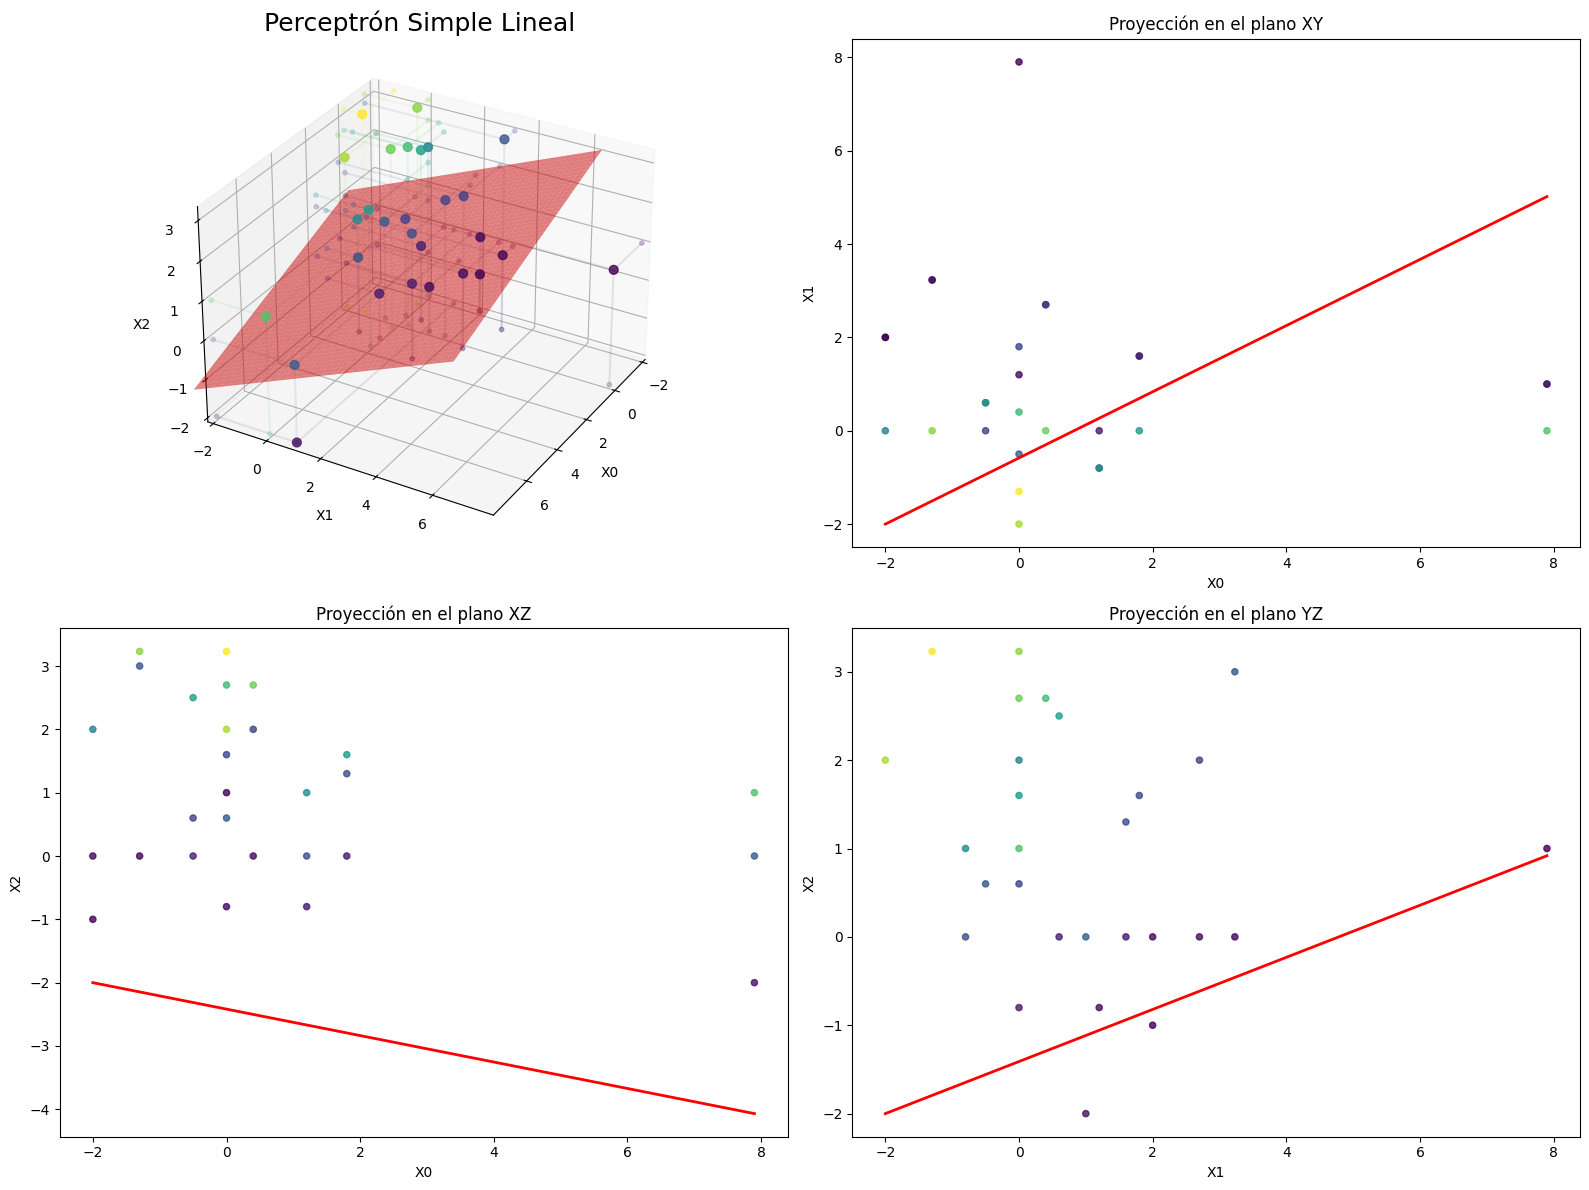

In [25]:
import numpy as np
import pandas as pd
from src.perceptron_simple_lineal import perceptron_simple_lineal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ruta del archivo CSV
archivo_csv = "TP3-ej2-conjunto.csv"
# Leer datos CSV en un DataFrame de pandas
datos_df = pd.read_csv(archivo_csv)
# Convertir DataFrame a un array de NumPy
datos_array = datos_df.to_numpy()
# Extract feature columns (x1, x2, x3) into 'x' array
x = datos_array[:, :-1]  # Assuming 'y' is the last column

# Extract target column (y) into 'y' array
y = datos_array[:, -1]

eta = 0.01
epoch = 100
epsilon = 0.01 
w, e = perceptron_simple_lineal(x.copy(), y, eta, epsilon, epoch)

# Normalizar valores de 'y' para el colormap
y_norm = (y - y.min()) / (y.max() - y.min())

# Definir colormap y escalar
cmap = plt.cm.viridis
norm = plt.Normalize(0, 1)

# Graficar plano y puntos
#fig = plt.figure(figsize=(20, 16))
#ax = fig.add_subplot(111, projection='3d')
fig = plt.figure(figsize=(16, 12))
ax3d = fig.add_subplot(221, projection='3d')

# Graficar plano
X, Y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
Z = -(w[0] + w[1] * X + w[2] * Y) / w[3] 
ax3d.plot_surface(X, Y, Z, color='red', alpha=0.5)

# Graficar puntos
points = ax3d.scatter(x[:, 0], x[:, 1], x[:, 2], c=cmap(y_norm), s=40, alpha=0.8)

x0_min = x[:, 0].min()
x1_min = x[:, 1].min()
x2_min = x[:, 2].min()
# Proyecciones en el plano X0-X1 (plano de fondo XY)
for i in range(len(x)):
    ax3d.plot([x[i, 0], x[i, 0]], [x[i, 1], x[i, 1]], [x2_min, x[i, 2]], color=cmap(y_norm[i]), alpha=0.1)
# Proyecciones en el plano X0-X2 (plano de fondo XZ)
for i in range(len(x)):
    ax3d.plot([x[i, 0], x[i, 0]], [x1_min, x[i, 1]], [x[i, 2], x[i, 2]], color=cmap(y_norm[i]), alpha=0.1)
# Proyecciones en el plano X1-X2 (plano de fondo YZ)
for i in range(len(x)):
    ax3d.plot([x0_min, x[i, 0]], [x[i, 1], x[i, 1]], [x[i, 2], x[i, 2]], color=cmap(y_norm[i]), alpha=0.1)

# Puntos proyectados en el plano X0-X1 (plano de fondo XY)
ax3d.scatter(x[:, 0], x[:, 1], x2_min*np.ones(len(x)), c=cmap(y_norm), s=10, alpha=0.2)
# Puntos proyectados en el plano X0-X2 (plano de fondo XZ)
ax3d.scatter(x[:, 0], x1_min*np.ones(len(x)), x[:, 2], c=cmap(y_norm), s=10, alpha=0.2)
# Puntos proyectados en el plano X1-X2 (plano de fondo YZ)
ax3d.scatter(x0_min*np.ones(len(x)), x[:, 1], x[:, 2], c=cmap(y_norm), s=10, alpha=0.2)

# Ajustar etiquetas y título
ax3d.set_xlabel('X0', fontsize=10)  # Set font size for x-axis label
ax3d.set_ylabel('X1', fontsize=10)  # Set font size for y-axis label
ax3d.set_zlabel('X2', fontsize=10)  # Set font size for z-axis label
ax3d.set_title('Perceptrón Simple Lineal ', fontsize=18)  # Set font size for title

# Ajustar vista
ax3d.view_init(elev=30, azim=30)
ax3d.set_xlim(x[:, 0].min(), x[:, 0].max())  # Set z-axis limits based on data range
ax3d.set_ylim(x[:, 1].min(), x[:, 1].max())  # Set z-axis limits based on data range
ax3d.set_zlim(x[:, 2].min(), x[:, 2].max())  # Set z-axis limits based on data range

# Añadir 'points' al eje y crear la barra de color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(y)
cbar = fig.colorbar(sm, label='Valor de Y', ax=ax, fraction=0.02)  

# Mostrar gráfico
#plt.tight_layout()
#plt.subplots_adjust(left=0.5)

# Calcular los valores mínimos de x, y, z
x0_min, x1_min, x2_min = x[:, 0].min(), x[:, 1].min(), x[:, 2].min()
x0_max, x1_max, x2_max = x[:, 0].max(), x[:, 1].max(), x[:, 2].max()

# Proyecciones 2D
ax_xy = fig.add_subplot(222)
#ax_xy.set_xlim(x[:, 0].min(), x[:, 0].max())  # Set z-axis limits based on data range
#ax_xy.set_ylim(x[:, 1].min(), x[:, 1].max())  # Set z-axis limits based on data range
ax_xz = fig.add_subplot(223)
#ax_xz.set_xlim(x[:, 0].min(), x[:, 0].max())  # Set z-axis limits based on data range
#ax_xz.set_ylim(x[:, 2].min(), x[:, 2].max())  # Set z-axis limits based on data range
ax_yz = fig.add_subplot(224)
#ax_yz.set_xlim(x[:, 1].min(), x[:, 1].max())  # Set z-axis limits based on data range
#ax_yz.set_ylim(x[:, 2].min(), x[:, 2].max())  # Set z-axis limits based on data range

# Proyección en el plano XY
ax_xy.scatter(x[:, 0], x[:, 1], c=cmap(y_norm), s=20, alpha=0.8)
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xy_slope = -w[1]/w[2]
ax_xy.plot([x_min, x_max], [xy_slope*(x_min-x0_min)+x1_min, xy_slope*(x_max-x0_min)+x1_min], color='r', linewidth=2)
ax_xy.set_xlabel('X0')
ax_xy.set_ylabel('X1')
ax_xy.set_title('Proyección en el plano XY')

# Proyección en el plano XZ
ax_xz.scatter(x[:, 0], x[:, 2], c=cmap(y_norm), s=20, alpha=0.8)
xz_slope = -w[1]/w[3]
ax_xz.plot([x_min, x_max], [xz_slope*(x_min-x0_min)+x2_min, xz_slope*(x_max-x0_min)+x2_min], color='r', linewidth=2)
ax_xz.set_xlabel('X0')
ax_xz.set_ylabel('X2')
ax_xz.set_title('Proyección en el plano XZ')

# Proyección en el plano YZ
ax_yz.scatter(x[:, 1], x[:, 2], c=cmap(y_norm), s=20, alpha=0.8)
yz_slope = -w[2]/w[3]
ax_yz.plot([x1_min, x1_max], [yz_slope*(x1_min-x1_min)+x2_min, yz_slope*(x1_max-x1_min)+x2_min], color='r', linewidth=2)
ax_yz.set_xlabel('X1')
ax_yz.set_ylabel('X2')
ax_yz.set_title('Proyección en el plano YZ')

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import pandas as pd
from src.perceptron_simple_nolineal import perceptron_simple_nolineal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ruta del archivo CSV
archivo_csv = "TP3-ej2-conjunto.csv"
# Leer datos CSV en un DataFrame de pandas
datos_df = pd.read_csv(archivo_csv)
# Convertir DataFrame a un array de NumPy
datos_array = datos_df.to_numpy()
# Extract feature columns (x1, x2, x3) into 'x' array
x = datos_array[:, :-1]  # Assuming 'y' is the last column

# Extract target column (y) into 'y' array
y = datos_array[:, -1]

eta = 0.01
epoch = 100
epsilon = 0.01 
w3 = perceptron_simple_nolineal(x.copy(), y, eta, epsilon, epoch)
print(f"Pesos finales: {w3}")

Pesos finales: [1.14253619 0.52457898 0.29452474 1.33082387]


In [6]:
import random
import pandas as pd
import numpy as np

def getTrainingSet(vector1,vector2,k):
    # Vector 1 (matriz) de dimensiones m x n
    #vector1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])

    # Vector 2 (vector columna) de dimensiones m x 1
    #vector2 = np.array([1, 2, 3, 4, 5])

    # Número de partes en las que dividir los vectores
    #k = 2

    # Dividir vector1 en k partes
    div_vector1 = np.array_split(vector1, k, axis=0)

    # Dividir vector2 en k partes
    div_vector2 = np.array_split(vector2, k)

    print("Vector 1 original:")
    print(vector1)

    print("\nVector 2 original:", vector2)

    print("\nVector 1 dividido en", k, "partes:")
    for parte in div_vector1:
        print(parte)

    print("\nVector 2 dividido en", k, "partes:")
    for parte in div_vector2:
        print(parte)

# Ruta del archivo CSV
archivo_csv = "TP3-ej2-conjunto.csv"
# Leer datos CSV en un DataFrame de pandas
datos_df = pd.read_csv(archivo_csv)
# Convertir DataFrame a un array de NumPy
datos_array = datos_df.to_numpy()
# Extract feature columns (x1, x2, x3) into 'x' array
x3 = datos_array[:, :-1]  # Assuming 'y' is the last column

# Extract target column (y) into 'y' array
y3 = datos_array[:, -1]
#print("x")
#print(x3)
#print("y")
#print(y3)

getTrainingSet(x3, y3, 2)
#print(sub_x)
#print(sub_y)

Vector 1 original:
[[ 1.2  -0.8   0.  ]
 [ 1.2   0.   -0.8 ]
 [ 1.2  -0.8   1.  ]
 [ 0.    1.2  -0.8 ]
 [ 7.9   1.    0.  ]
 [ 0.4   0.    2.7 ]
 [ 0.    0.4   2.7 ]
 [-1.3   3.23  3.  ]
 [ 0.4   2.7   0.  ]
 [ 0.4   2.7   2.  ]
 [-1.3   0.    3.23]
 [ 0.   -1.3   3.23]
 [ 7.9   1.   -2.  ]
 [ 1.8   0.    1.6 ]
 [ 0.   -2.    2.  ]
 [-0.5   0.6   0.  ]
 [ 0.    1.8   1.6 ]
 [-2.    2.    0.  ]
 [-0.5   0.6   2.5 ]
 [ 7.9   0.    1.  ]
 [-1.3   3.23  0.  ]
 [ 0.    7.9   1.  ]
 [-2.    0.    2.  ]
 [-2.    2.   -1.  ]
 [ 0.   -0.5   0.6 ]
 [ 1.8   1.6   1.3 ]
 [-0.5   0.    0.6 ]
 [ 1.8   1.6   0.  ]]

Vector 2 original: [21.755  7.176 43.045  2.875 26.503 68.568 61.301 23.183  2.82  17.654
 72.512 88.184  4.653 49.    76.852  7.871 18.543  2.66  51.    64.107
  1.48   0.32  40.131  0.995 24.974 21.417 18.243  6.914]

Vector 1 dividido en 2 partes:
[[ 1.2  -0.8   0.  ]
 [ 1.2   0.   -0.8 ]
 [ 1.2  -0.8   1.  ]
 [ 0.    1.2  -0.8 ]
 [ 7.9   1.    0.  ]
 [ 0.4   0.    2.7 ]
 [ 0.    0.4  

In [1]:
from main2 import main2

main2()

TP 3: PERCEPTRON SIMPLE
EJERCIO 2
Entrenando con Perceptron Simple Lineal
Pesos finales: [1.47684404 0.55564303 0.84594173 1.9894931 ]
Entrenando con Perceptron Simple Lineal K
Pesos finales: [39.68021706 29.52339856 41.69481975 63.98786972]
Entrenando con Perceptron Simple No Lineal
Pesos finales: [2.19802    0.51959624 0.37670304 1.24981492]
Entrenando con Perceptron Simple No Lineal K
Pesos finales: [0.4391944  0.38514464 0.65304397 0.09351994]


In [ ]:
import numpy as np
import pandas as pd
from src.perceptron_simple_lineal import perceptron_simple_lineal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ruta del archivo CSV
archivo_csv = "TP3-ej2-conjunto.csv"
# Leer datos CSV en un DataFrame de pandas
datos_df = pd.read_csv(archivo_csv)
# Convertir DataFrame a un array de NumPy
datos_array = datos_df.to_numpy()
# Extract feature columns (x1, x2, x3) into 'x' array
x = datos_array[:, :-1]  # Assuming 'y' is the last column

# Extract target column (y) into 'y' array
y = datos_array[:, -1]

eta = 0.01
epoch = 100
epsilon = 0.01

# Normalizar valores de 'y' para el colormap
y_norm = (y - y.min()) / (y.max() - y.min())

# Definir colormap y escalar
cmap = plt.cm.viridis
norm = plt.Normalize(0, 1)

for _ in range(10):
    w = perceptron_simple_lineal(x.copy(), y, eta, epsilon, epoch)

    # Graficar plano y puntos
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar plano
    X, Y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    Z = -(w[0] + w[1] * X + w[2] * Y) / w[3] 
    ax.plot_surface(X, Y, Z, color='red', alpha=0.5)

    # Graficar puntos
    points = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=cmap(y_norm), s=40, alpha=0.8)

    # Ajustar etiquetas y título
    ax.set_xlabel('X0', fontsize=10)  # Set font size for x-axis label
    ax.set_ylabel('X1', fontsize=10)  # Set font size for y-axis label
    ax.set_zlabel('X2', fontsize=10)  # Set font size for z-axis label
    ax.set_title('Perceptrón Simple Lineal ', fontsize=18)  # Set font size for title

    # Ajustar vista
    ax.view_init(elev=15, azim=60)
    ax.set_zlim(x[:, 2].min(), x[:, 2].max())  # Set z-axis limits based on data range

    # Añadir 'points' al eje y crear la barra de color
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(y)
    cbar = fig.colorbar(sm, label='Valor de Y', ax=ax, fraction=0.02)  

    # Mostrar gráfico
    plt.tight_layout()
    plt.subplots_adjust(left=0.5)
plt.show()
